In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import cKDTree

In [104]:

datasets = {
    "canopint": "/content/CanopInt_inst_data.csv",
    "country_lookup": "/content/country_latitude_longitude_area_lookup.csv",
    "land_cover": "/content/Land_cover_percent_data.csv",
    "yield_production": "/content/Yield_and_Production_data.csv",
    "snow": "/content/Snowf_tavg_data.csv",
    "esoil": "/content/ESoil_tavg_data.csv",
    "rain": "/content/Rainf_tavg_data.csv",
    "soil_moi_0_10": "/content/SoilMoi0_10cm_inst_data.csv",
    "soil_moi_10_40": "/content/SoilMoi10_40cm_inst_data.csv",
    "soil_moi_40_100": "/content/SoilMoi40_100cm_inst_data.csv",
    "soil_moi_100_200": "/content/SoilMoi100_200cm_inst_data.csv",
    "soil_tmp_0_10": "/content/SoilTMP0_10cm_inst_data.csv",
    "soil_tmp_10_40": "/content/SoilTMP10_40cm_inst_data.csv",
    "soil_tmp_40_100": "/content/SoilTMP40_100cm_inst_data.csv",
    "soil_tmp_100_200": "/content/SoilTMP100_200cm_inst_data.csv",
    "tveg": "/content/TVeg_tavg_data.csv",
    "tws": "/content/TWS_inst_data.csv"
}




In [105]:

import pandas as pd

# Load and print each dataset
for name, path in datasets.items():
    df = pd.read_csv(path)
    print(f"--- Dataset: {name} ---")
    print(df.head())  # Show first few rows for readability
    print(f"Shape: {df.shape}")
    print("\n")


--- Dataset: canopint ---
   longitude  latitude  CanopInt_inst_month_1  CanopInt_inst_month_2  \
0      -71.5     -54.5               0.102090               0.157268   
1      -70.5     -54.5               0.093179               0.132215   
2      -69.5     -54.5               0.092867               0.134192   
3      -68.5     -54.5               0.114641               0.156808   
4      -67.5     -54.5               0.132172               0.174698   

   CanopInt_inst_month_3  CanopInt_inst_month_4  CanopInt_inst_month_5  \
0               0.148165               0.134536               0.058467   
1               0.137757               0.126014               0.052497   
2               0.149097               0.124636               0.058634   
3               0.150524               0.127552               0.074838   
4               0.167903               0.153996               0.085783   

   CanopInt_inst_month_6  CanopInt_inst_month_7  CanopInt_inst_month_8  \
0               0.0350

In [106]:
# Aggregates monthly columns (e.g. rain_01 to rain_12) into a yearly mean
def aggregate_monthly_columns(df, prefix):
    month_cols = [col for col in df.columns if col.startswith(prefix + "_")]

    if len(month_cols) != 12:
        print(f"Warning: Found {len(month_cols)} columns for {prefix}, expected 12.")

    df[f'{prefix}_mean'] = df[month_cols].mean(axis=1)
    return df[['longitude', 'latitude', 'year', f'{prefix}_mean']]

In [107]:
import pandas as pd

#  Define file paths
file_paths = {
    'Rainf_tavg': "/content/Rainf_tavg_data.csv",
    'Snowf_tavg': "/content/Snowf_tavg_data.csv",
    'ESoil_tavg': "/content/ESoil_tavg_data.csv",
    'TVeg_tavg': "/content/TVeg_tavg_data.csv",
    'CanopInt_inst': "/content/CanopInt_inst_data.csv",
    'TWS_inst': "/content/TWS_inst_data.csv",
    'SoilMoi0_10cm_inst': "/content/SoilMoi0_10cm_inst_data.csv",
    'SoilMoi10_40cm_inst': "/content/SoilMoi10_40cm_inst_data.csv",
    'SoilMoi40_100cm_inst': "/content/SoilMoi40_100cm_inst_data.csv",
    'SoilMoi100_200cm_inst': "/content/SoilMoi100_200cm_inst_data.csv",
    'SoilTMP0_10cm_inst': "/content/SoilTMP0_10cm_inst_data.csv",
    'SoilTMP10_40cm_inst': "/content/SoilTMP10_40cm_inst_data.csv",
    'SoilTMP40_100cm_inst': "/content/SoilTMP40_100cm_inst_data.csv",
    'SoilTMP100_200cm_inst': "/content/SoilTMP100_200cm_inst_data.csv"
}

#  Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

#  Define robust aggregation function
def aggregate_monthly_columns(df, prefix):
    # Find monthly columns: must contain prefix and end in "_1" to "_12"
    monthly_cols = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(f"_{i}") for i in range(1, 13))]

    if len(monthly_cols) != 12:
        print(f"Warning: {prefix} has {len(monthly_cols)} monthly columns: {monthly_cols}")

    df[f"{prefix}_mean"] = df[monthly_cols].mean(axis=1)
    return df.drop(columns=monthly_cols)

#  Aggregate datasets
aggregated = {}
for prefix, df in datasets.items():
    aggregated[prefix] = aggregate_monthly_columns(df, prefix)
    print(f"Aggregated {prefix}:\n", aggregated[prefix].head(), "\n")


Aggregated Rainf_tavg:
    longitude  latitude  year  Rainf_tavg_mean
0      -71.5     -54.5  2010         0.000029
1      -70.5     -54.5  2010         0.000021
2      -69.5     -54.5  2010         0.000016
3      -68.5     -54.5  2010         0.000016
4      -67.5     -54.5  2010         0.000020 

Aggregated Snowf_tavg:
    longitude  latitude  year  Snowf_tavg_mean
0      -71.5     -54.5  2010     3.019042e-07
1      -70.5     -54.5  2010     3.672619e-07
2      -69.5     -54.5  2010     1.703200e-06
3      -68.5     -54.5  2010     1.325932e-06
4      -67.5     -54.5  2010     6.783212e-07 

Aggregated ESoil_tavg:
    longitude  latitude  year  ESoil_tavg_mean
0      -71.5     -54.5  2010        32.854129
1      -70.5     -54.5  2010        21.669016
2      -69.5     -54.5  2010        18.996636
3      -68.5     -54.5  2010        22.848139
4      -67.5     -54.5  2010        25.023299 

Aggregated TVeg_tavg:
    longitude  latitude  year  TVeg_tavg_mean
0      -71.5     -54.5  20

In [108]:
# Start with rainfall as base
prefinal_df = aggregated['Rainf_tavg'].copy()
merge_keys = ['longitude', 'latitude', 'year']

# Merge all remaining datasets into prefinal_df
for key, df in aggregated.items():
    if key != 'Rainf_tavg':
        prefinal_df = prefinal_df.merge(df, on=merge_keys, how='left')
        print(f" Merged: {key}")

print(f"\n Final shape after merging: {prefinal_df.shape}")
prefinal_df.head(5)



 Merged: Snowf_tavg
 Merged: ESoil_tavg
 Merged: TVeg_tavg
 Merged: CanopInt_inst
 Merged: TWS_inst
 Merged: SoilMoi0_10cm_inst
 Merged: SoilMoi10_40cm_inst
 Merged: SoilMoi40_100cm_inst
 Merged: SoilMoi100_200cm_inst
 Merged: SoilTMP0_10cm_inst
 Merged: SoilTMP10_40cm_inst
 Merged: SoilTMP40_100cm_inst
 Merged: SoilTMP100_200cm_inst

 Final shape after merging: (194298, 17)


,longitude,latitude,year,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,CanopInt_inst_mean,TWS_inst_mean,SoilMoi0_10cm_inst_mean,SoilMoi10_40cm_inst_mean,SoilMoi40_100cm_inst_mean,SoilMoi100_200cm_inst_mean,SoilTMP0_10cm_inst_mean,SoilTMP10_40cm_inst_mean,SoilTMP40_100cm_inst_mean,SoilTMP100_200cm_inst_mean
0,-71.5,-54.5,2010,0.000029,3.019042e-07,32.854129,0.489381,0.085151,1410.814167,26.783010,80.720931,161.612975,269.236008,278.062800,278.037967,278.060492,278.098683
1,-70.5,-54.5,2010,0.000021,3.672619e-07,21.669016,0.478433,0.076606,1425.798500,35.125623,105.392675,210.755892,351.342075,276.880392,276.874533,276.907442,276.964208
2,-69.5,-54.5,2010,0.000016,1.703200e-06,18.996636,0.464609,0.075086,1240.800583,47.525823,143.568792,275.988775,458.367008,275.207533,275.158975,275.219875,275.369758
3,-68.5,-54.5,2010,0.000016,1.325932e-06,22.848139,2.541678,0.084879,1304.636750,28.041316,83.348517,149.835692,250.297008,276.526433,276.270833,276.307492,276.468267
4,-67.5,-54.5,2010,0.000020,6.783212e-07,25.023299,5.152414,0.097723,1289.169417,26.232962,78.737764,143.966250,242.497500,277.278858,277.050583,277.057117,277.114250


In [109]:
prefinal_df.columns

Index(['longitude', 'latitude', 'year', 'Rainf_tavg_mean', 'Snowf_tavg_mean',
       'ESoil_tavg_mean', 'TVeg_tavg_mean', 'CanopInt_inst_mean',
       'TWS_inst_mean', 'SoilMoi0_10cm_inst_mean', 'SoilMoi10_40cm_inst_mean',
       'SoilMoi40_100cm_inst_mean', 'SoilMoi100_200cm_inst_mean',
       'SoilTMP0_10cm_inst_mean', 'SoilTMP10_40cm_inst_mean',
       'SoilTMP40_100cm_inst_mean', 'SoilTMP100_200cm_inst_mean'],
      dtype='object')

In [110]:
prefinal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   longitude                   194298 non-null  float64
 1   latitude                    194298 non-null  float64
 2   year                        194298 non-null  int64  
 3   Rainf_tavg_mean             194298 non-null  float64
 4   Snowf_tavg_mean             194298 non-null  float64
 5   ESoil_tavg_mean             194298 non-null  float64
 6   TVeg_tavg_mean              194298 non-null  float64
 7   CanopInt_inst_mean          194298 non-null  float64
 8   TWS_inst_mean               194298 non-null  float64
 9   SoilMoi0_10cm_inst_mean     194298 non-null  float64
 10  SoilMoi10_40cm_inst_mean    194298 non-null  float64
 11  SoilMoi40_100cm_inst_mean   194298 non-null  float64
 12  SoilMoi100_200cm_inst_mean  194298 non-null  float64
 13  SoilTMP0_10cm_

In [111]:
import pandas as pd

# Load the country lookup file
country_lookup = pd.read_csv("/content/country_latitude_longitude_area_lookup.csv")

# Display unique values in the 'country' column
unique_countries = country_lookup['country'].unique()

# Print the list
print("Unique countries:")
print(unique_countries)

# Optional: print how many unique countries there are
print(f"\nTotal unique countries: {len(unique_countries)}")


Unique countries:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cabo Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Cocos [Keeling] Islands' 'Colombia' 'Comoros'
 'DemocraticRepublic of the Congo' 'Congo [Republic]' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Falkland Islands [Islas Malvi

In [112]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# Load datasets
country_lookup = pd.read_csv("/content/country_latitude_longitude_area_lookup.csv")
land_cover = pd.read_csv("/content/Land_cover_percent_data.csv")

#  Clean the country_lookup (centroid) data
country_lookup.columns = country_lookup.columns.str.strip()
country_lookup = country_lookup.rename(columns={
    'centroid latitude': 'latitude',
    'centroid longitude': 'longitude'
})

country_lookup['latitude'] = country_lookup['latitude'].astype(float).round(1)
country_lookup['longitude'] = country_lookup['longitude'].astype(float).round(1)

# Remove missing/infinite values
lookup_clean = country_lookup.dropna(subset=['latitude', 'longitude'])
lookup_clean = lookup_clean[np.isfinite(lookup_clean['latitude']) & np.isfinite(lookup_clean['longitude'])]

#  Clean land cover coordinates
land_cover['latitude'] = land_cover['latitude'].astype(float).round(1)
land_cover['longitude'] = land_cover['longitude'].astype(float).round(1)

#  Build KDTree from centroids
tree = cKDTree(lookup_clean[['latitude', 'longitude']].to_numpy())
land_coords = land_cover[['latitude', 'longitude']].to_numpy()

# Find nearest centroid for each grid point
_, indices = tree.query(land_coords)

#  Assign country names based on nearest centroid
land_cover['country'] = lookup_clean.iloc[indices].reset_index(drop=True)['country'].values

#  Final result
land_cover.head()


,longitude,latitude,year,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_classh_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,...,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,country
0,-176.5,-59.5,2010,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tonga
1,-175.5,-59.5,2010,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tonga
2,-174.5,-59.5,2010,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tonga
3,-173.5,-59.5,2010,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tonga
4,-172.5,-59.5,2010,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tonga


In [113]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Get valid countries from both sources
mapped_countries = set(land_cover['country'].dropna().unique())
centroid_countries = set(lookup_clean['country'].dropna().unique())
valid_countries = sorted(mapped_countries & centroid_countries)

# Group countries by first letter
countries_by_letter = defaultdict(list)
for country in valid_countries:
    first_letter = country[0].upper()
    countries_by_letter[first_letter].append(country)

# Select up to 5 countries per letter
selected_countries = []
for letter, countries in countries_by_letter.items():
    selected_countries.extend(countries[:5])  # take first 5 (or fewer)

print(f"Total countries selected: {len(selected_countries)}")

Total countries selected: 104


<ipython-input-114-41a13677d32a>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-114-41a13677d32a>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-114-41a13677d32a>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-114-41a13677d32a>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-114-41a13677d32a>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



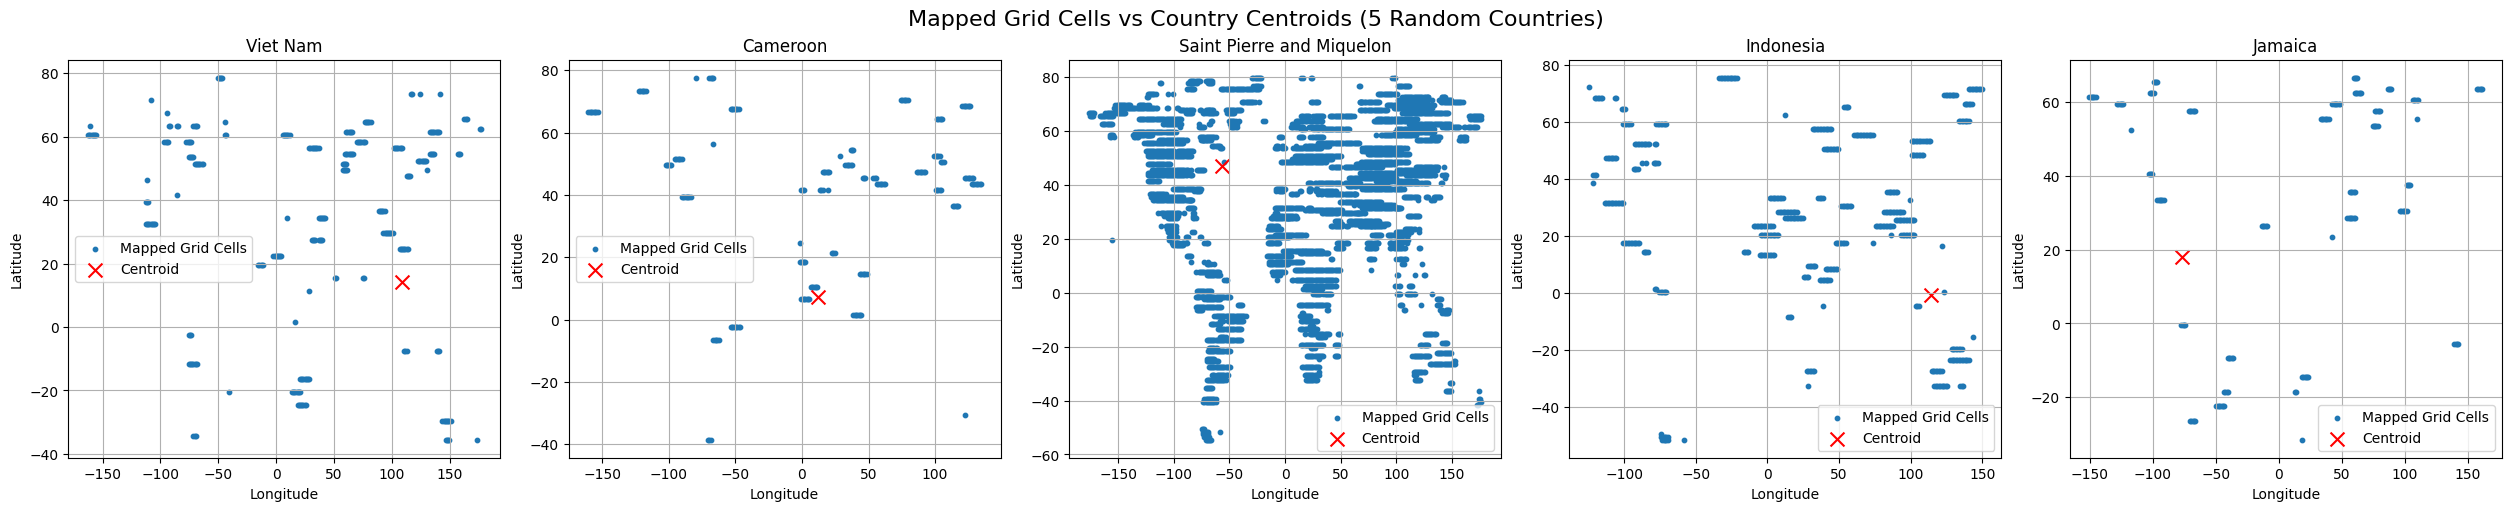

In [114]:
import matplotlib.pyplot as plt
import random

# Randomly select 5 countries
random_five = random.sample(selected_countries, 5)

# Create subplots: 5 columns in 1 row
fig, axes = plt.subplots(1, 5, figsize=(25, 5), constrained_layout=True)

for i, country in enumerate(random_five):
    mapped = prefinal_df[land_cover['country'] == country]
    centroid = lookup_clean[lookup_clean['country'] == country]

    ax = axes[i]

    if mapped.empty or centroid.empty:
        ax.set_title(f"{country} (No Data)")
        ax.axis('off')
        continue

    ax.scatter(mapped['longitude'], mapped['latitude'], s=10, label='Mapped Grid Cells')
    ax.scatter(centroid['longitude'], centroid['latitude'], color='red', marker='x', s=100, label='Centroid')

    ax.set_title(f"{country}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    ax.grid(True)

plt.suptitle("Mapped Grid Cells vs Country Centroids (5 Random Countries)", fontsize=16)
plt.show()


In [115]:
# Group by country and year, and average all numeric land cover features
land_cover_country_year = land_cover.groupby(['country', 'year']).mean(numeric_only=True).reset_index()

print("Aggregated land cover shape:", land_cover_country_year.shape)
land_cover_country_year[['country', 'year']].head()

Aggregated land cover shape: (3146, 21)


,country,year
0,Afghanistan,2010
1,Afghanistan,2011
2,Afghanistan,2012
3,Afghanistan,2013
4,Afghanistan,2014


In [116]:
import numpy as np
from scipy.spatial import cKDTree

#  Round coordinates in master_df
prefinal_df['latitude'] = prefinal_df['latitude'].astype(float).round(1)
prefinal_df['longitude'] = prefinal_df['longitude'].astype(float).round(1)

# Build KDTree if it doesn't exist
if 'tree' not in globals():
    tree = cKDTree(lookup_clean[['latitude', 'longitude']].to_numpy())

# Extract coordinates from master_df
env_grid_coordinates = prefinal_df[['latitude', 'longitude']].to_numpy()

#  Query nearest centroid using KDTree
_, indices = tree.query(env_grid_coordinates)

#  Assign country from nearest centroid
prefinal_df['country'] = lookup_clean.iloc[indices].reset_index(drop=True)['country'].values

#  Group and aggregate by country and year
environment_country_year = prefinal_df.groupby(['country', 'year'], as_index=False).mean(numeric_only=True)

# Output
print(" Environmental features aggregated by country and year:")
environment_country_year.head(50)

 Environmental features aggregated by country and year:


,country,year,longitude,latitude,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,CanopInt_inst_mean,TWS_inst_mean,SoilMoi0_10cm_inst_mean,SoilMoi10_40cm_inst_mean,SoilMoi40_100cm_inst_mean,SoilMoi100_200cm_inst_mean,SoilTMP0_10cm_inst_mean,SoilTMP10_40cm_inst_mean,SoilTMP40_100cm_inst_mean,SoilTMP100_200cm_inst_mean
0,Afghanistan,2010,65.759259,33.666667,0.000007,9.650432e-07,17.406516,0.665504,0.003434,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378
1,Afghanistan,2011,65.759259,33.666667,0.000008,1.733773e-06,17.658792,0.293760,0.004174,684.123852,17.474098,67.260410,132.755216,238.593572,289.398011,289.285327,289.169375,288.918274
2,Afghanistan,2012,65.759259,33.666667,0.000007,2.634706e-06,19.387013,0.779504,0.004708,699.515013,17.885093,68.767602,134.561956,239.145373,288.368113,288.356495,288.237801,288.069227
3,Afghanistan,2013,65.759259,33.666667,0.000008,1.361736e-06,20.860506,0.850076,0.004051,699.928255,18.206896,68.528548,135.918621,241.062339,289.715174,289.577175,289.413866,289.097295
4,Afghanistan,2014,65.759259,33.666667,0.000008,1.729525e-06,19.445957,0.668922,0.004531,695.321333,17.882212,68.116610,134.940831,239.098683,288.845817,288.725204,288.591054,288.418973
5,Afghanistan,2015,65.759259,33.666667,0.000011,1.474023e-06,22.961180,1.169278,0.004474,709.329171,18.852319,70.953128,141.179143,245.025223,289.681349,289.504648,289.323139,289.014696
6,Afghanistan,2016,65.759259,33.666667,0.000007,9.314142e-07,19.809441,0.922003,0.003814,698.939238,16.567422,69.327453,139.625471,244.822823,290.169079,290.091306,289.821877,289.422907
7,Afghanistan,2017,65.759259,33.666667,0.000006,2.087759e-06,16.211755,0.500611,0.003465,694.076992,15.956306,69.029705,138.388406,245.226235,289.616883,289.568854,289.425071,289.135256
8,Afghanistan,2018,65.759259,33.666667,0.000010,6.936727e-07,20.676496,0.769348,0.003757,683.863325,16.651093,69.360584,139.910498,245.674094,289.932216,289.858441,289.705743,289.384479
9,Afghanistan,2019,65.759259,33.666667,0.000009,2.900484e-06,21.521180,1.024864,0.004949,704.620740,19.009209,72.511858,144.816413,252.159056,288.714318,288.713155,288.618967,288.429901


In [117]:
land_cover_country_year.head(5)

,country,year,longitude,latitude,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_classh_4,Land_cover_percent_class_5,Land_cover_percent_class_6,...,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17
0,Afghanistan,2010,65.759259,33.666667,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2011,65.759259,33.666667,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2012,65.759259,33.666667,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,65.759259,33.666667,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2014,65.759259,33.666667,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
land_cover_country_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      3146 non-null   object 
 1   year                         3146 non-null   int64  
 2   longitude                    3146 non-null   float64
 3   latitude                     3146 non-null   float64
 4   Land_cover_percent_class_1   3146 non-null   float64
 5   Land_cover_percent_class_2   3146 non-null   float64
 6   Land_cover_percent_class_3   3146 non-null   float64
 7   Land_cover_percent_classh_4  3146 non-null   float64
 8   Land_cover_percent_class_5   3146 non-null   float64
 9   Land_cover_percent_class_6   3146 non-null   float64
 10  Land_cover_percent_class_7   3146 non-null   float64
 11  Land_cover_percent_class_8   3146 non-null   float64
 12  Land_cover_percent_class_9   3146 non-null   float64
 13  Land_cover_percent

In [119]:
environment_country_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     2548 non-null   object 
 1   year                        2548 non-null   int64  
 2   longitude                   2548 non-null   float64
 3   latitude                    2548 non-null   float64
 4   Rainf_tavg_mean             2548 non-null   float64
 5   Snowf_tavg_mean             2548 non-null   float64
 6   ESoil_tavg_mean             2548 non-null   float64
 7   TVeg_tavg_mean              2548 non-null   float64
 8   CanopInt_inst_mean          2548 non-null   float64
 9   TWS_inst_mean               2548 non-null   float64
 10  SoilMoi0_10cm_inst_mean     2548 non-null   float64
 11  SoilMoi10_40cm_inst_mean    2548 non-null   float64
 12  SoilMoi40_100cm_inst_mean   2548 non-null   float64
 13  SoilMoi100_200cm_inst_mean  2548 

In [120]:
environment_country_year.head()

,country,year,longitude,latitude,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,CanopInt_inst_mean,TWS_inst_mean,SoilMoi0_10cm_inst_mean,SoilMoi10_40cm_inst_mean,SoilMoi40_100cm_inst_mean,SoilMoi100_200cm_inst_mean,SoilTMP0_10cm_inst_mean,SoilTMP10_40cm_inst_mean,SoilTMP40_100cm_inst_mean,SoilTMP100_200cm_inst_mean
0,Afghanistan,2010,65.759259,33.666667,0.000007,9.650432e-07,17.406516,0.665504,0.003434,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378
1,Afghanistan,2011,65.759259,33.666667,0.000008,1.733773e-06,17.658792,0.293760,0.004174,684.123852,17.474098,67.260410,132.755216,238.593572,289.398011,289.285327,289.169375,288.918274
2,Afghanistan,2012,65.759259,33.666667,0.000007,2.634706e-06,19.387013,0.779504,0.004708,699.515013,17.885093,68.767602,134.561956,239.145373,288.368113,288.356495,288.237801,288.069227
3,Afghanistan,2013,65.759259,33.666667,0.000008,1.361736e-06,20.860506,0.850076,0.004051,699.928255,18.206896,68.528548,135.918621,241.062339,289.715174,289.577175,289.413866,289.097295
4,Afghanistan,2014,65.759259,33.666667,0.000008,1.729525e-06,19.445957,0.668922,0.004531,695.321333,17.882212,68.116610,134.940831,239.098683,288.845817,288.725204,288.591054,288.418973


In [121]:
# Merge environmental and land cover features on country + year
final_df = environment_country_year.merge(land_cover_country_year, on=['country', 'year'], how='left')

# Show resulting shape and first 20 country-year pairs
print("Final dataset shape after merging land cover with environmental features:", final_df.shape)
print(final_df[['country', 'year']].head(20))


Final dataset shape after merging land cover with environmental features: (2548, 37)
        country  year
0   Afghanistan  2010
1   Afghanistan  2011
2   Afghanistan  2012
3   Afghanistan  2013
4   Afghanistan  2014
5   Afghanistan  2015
6   Afghanistan  2016
7   Afghanistan  2017
8   Afghanistan  2018
9   Afghanistan  2019
10  Afghanistan  2020
11  Afghanistan  2021
12  Afghanistan  2022
13      Albania  2010
14      Albania  2011
15      Albania  2012
16      Albania  2013
17      Albania  2014
18      Albania  2015
19      Albania  2016


In [122]:
final_df.head()

,country,year,longitude_x,latitude_x,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,CanopInt_inst_mean,TWS_inst_mean,...,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17
0,Afghanistan,2010,65.759259,33.666667,0.000007,9.650432e-07,17.406516,0.665504,0.003434,688.719626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2011,65.759259,33.666667,0.000008,1.733773e-06,17.658792,0.293760,0.004174,684.123852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2012,65.759259,33.666667,0.000007,2.634706e-06,19.387013,0.779504,0.004708,699.515013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,65.759259,33.666667,0.000008,1.361736e-06,20.860506,0.850076,0.004051,699.928255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2014,65.759259,33.666667,0.000008,1.729525e-06,19.445957,0.668922,0.004531,695.321333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2548 non-null   object 
 1   year                         2548 non-null   int64  
 2   longitude_x                  2548 non-null   float64
 3   latitude_x                   2548 non-null   float64
 4   Rainf_tavg_mean              2548 non-null   float64
 5   Snowf_tavg_mean              2548 non-null   float64
 6   ESoil_tavg_mean              2548 non-null   float64
 7   TVeg_tavg_mean               2548 non-null   float64
 8   CanopInt_inst_mean           2548 non-null   float64
 9   TWS_inst_mean                2548 non-null   float64
 10  SoilMoi0_10cm_inst_mean      2548 non-null   float64
 11  SoilMoi10_40cm_inst_mean     2548 non-null   float64
 12  SoilMoi40_100cm_inst_mean    2548 non-null   float64
 13  SoilMoi100_200cm_i

In [124]:
final_df = final_df.drop(columns=['latitude_y', 'longitude_y'])
final_df = final_df.rename(columns={'latitude_x': 'latitude', 'longitude_x': 'longitude'})

In [125]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2548 non-null   object 
 1   year                         2548 non-null   int64  
 2   longitude                    2548 non-null   float64
 3   latitude                     2548 non-null   float64
 4   Rainf_tavg_mean              2548 non-null   float64
 5   Snowf_tavg_mean              2548 non-null   float64
 6   ESoil_tavg_mean              2548 non-null   float64
 7   TVeg_tavg_mean               2548 non-null   float64
 8   CanopInt_inst_mean           2548 non-null   float64
 9   TWS_inst_mean                2548 non-null   float64
 10  SoilMoi0_10cm_inst_mean      2548 non-null   float64
 11  SoilMoi10_40cm_inst_mean     2548 non-null   float64
 12  SoilMoi40_100cm_inst_mean    2548 non-null   float64
 13  SoilMoi100_200cm_i

In [126]:
import pandas as pd

# Step 1: Load the yield data
yield_production = pd.read_csv("/content/Yield_and_Production_data.csv")

In [127]:
yield_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158269 entries, 0 to 158268
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Domain           158269 non-null  object 
 1   Country          158269 non-null  object 
 2   Element          158269 non-null  object 
 3   Item Code (CPC)  158269 non-null  object 
 4   Item             158269 non-null  object 
 5   Year             158269 non-null  int64  
 6   Value            158269 non-null  float64
 7   Flag             158269 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.7+ MB


In [128]:
yield_df = yield_production[yield_production['Element'] == 'Yield'].copy()
yield_df = yield_df[['Country', 'Item', 'Year', 'Value']]
yield_df.columns = ['country', 'crop', 'year', 'yield']

final_df = yield_df.merge(final_df, on=['country', 'year'], how='inner')

In [129]:
final_df

,country,crop,year,yield,longitude,latitude,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,...,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17
0,Afghanistan,Apples,2010,7000.0,65.759259,33.666667,0.000007,9.650432e-07,17.406516,0.665504,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,Afghanistan,Apples,2011,7000.0,65.759259,33.666667,0.000008,1.733773e-06,17.658792,0.293760,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Afghanistan,Apples,2012,7651.9,65.759259,33.666667,0.000007,2.634706e-06,19.387013,0.779504,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,Afghanistan,Apples,2013,7600.5,65.759259,33.666667,0.000008,1.361736e-06,20.860506,0.850076,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Afghanistan,Apples,2014,7300.0,65.759259,33.666667,0.000008,1.729525e-06,19.445957,0.668922,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67958,Zimbabwe,Vegetables Primary,2018,6651.8,29.094595,-19.121622,0.000021,0.000000e+00,29.880679,12.558805,...,0.0,0.0,0.0,0.108108,0.0,0.0,0.0,0.0,0.0,99.891892
67959,Zimbabwe,Vegetables Primary,2019,6483.0,29.094595,-19.121622,0.000015,0.000000e+00,25.630761,7.830832,...,0.0,0.0,0.0,0.135135,0.0,0.0,0.0,0.0,0.0,99.864865
67960,Zimbabwe,Vegetables Primary,2020,6562.8,29.094595,-19.121622,0.000021,0.000000e+00,27.630089,10.965249,...,0.0,0.0,0.0,0.189189,0.0,0.0,0.0,0.0,0.0,99.810811
67961,Zimbabwe,Vegetables Primary,2021,6612.6,29.094595,-19.121622,0.000013,0.000000e+00,22.604501,7.029131,...,0.0,0.0,0.0,0.270270,0.0,0.0,0.0,0.0,0.0,99.729730


In [130]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67963 entries, 0 to 67962
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      67963 non-null  object 
 1   crop                         67963 non-null  object 
 2   year                         67963 non-null  int64  
 3   yield                        67963 non-null  float64
 4   longitude                    67963 non-null  float64
 5   latitude                     67963 non-null  float64
 6   Rainf_tavg_mean              67963 non-null  float64
 7   Snowf_tavg_mean              67963 non-null  float64
 8   ESoil_tavg_mean              67963 non-null  float64
 9   TVeg_tavg_mean               67963 non-null  float64
 10  CanopInt_inst_mean           67963 non-null  float64
 11  TWS_inst_mean                67963 non-null  float64
 12  SoilMoi0_10cm_inst_mean      67963 non-null  float64
 13  SoilMoi10_40cm_i

In [131]:
# Reorder columns: move 'crop', 'year', 'yield' to the end
cols = final_df.columns.tolist()

# Identify and remove the target columns from their current position
for col in ['crop', 'year', 'yield']:
    if col in cols:
        cols.remove(col)

# Append them to the end
cols += ['crop', 'year', 'yield']

# Reorder the DataFrame
final_df = final_df[cols]

# Preview the result
display(final_df.head())


,country,longitude,latitude,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,CanopInt_inst_mean,TWS_inst_mean,SoilMoi0_10cm_inst_mean,...,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,crop,year,yield
0,Afghanistan,65.759259,33.666667,0.000007,9.650432e-07,17.406516,0.665504,0.003434,688.719626,16.522271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,2010,7000.0
1,Afghanistan,65.759259,33.666667,0.000008,1.733773e-06,17.658792,0.293760,0.004174,684.123852,17.474098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,2011,7000.0
2,Afghanistan,65.759259,33.666667,0.000007,2.634706e-06,19.387013,0.779504,0.004708,699.515013,17.885093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,2012,7651.9
3,Afghanistan,65.759259,33.666667,0.000008,1.361736e-06,20.860506,0.850076,0.004051,699.928255,18.206896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,2013,7600.5
4,Afghanistan,65.759259,33.666667,0.000008,1.729525e-06,19.445957,0.668922,0.004531,695.321333,17.882212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,2014,7300.0


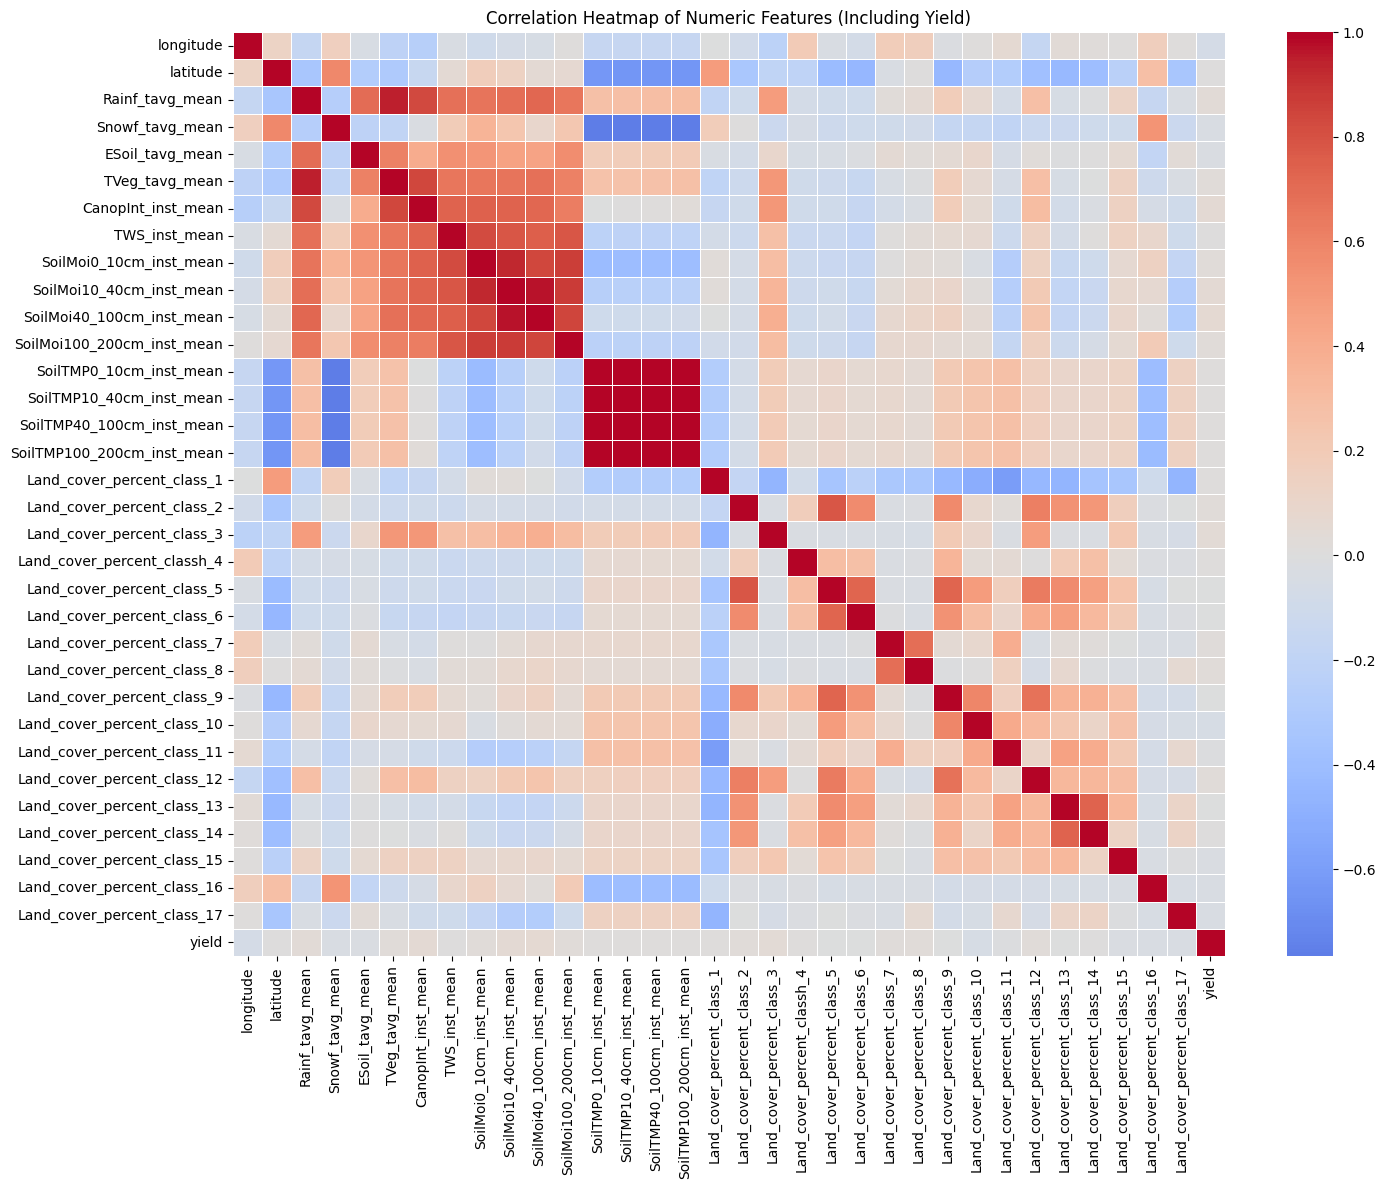

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features only (excluding categorical ones)
numeric_features = final_df.select_dtypes(include=['float64', 'int64']).drop(columns=['year'])  # keep 'yield'

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (Including Yield)")
plt.show()


In [133]:
# Choose your target country
target_country = "Afghanistan"  # You can change this to any country in the dataset

#  Filter for the selected country only
country_df = final_df[final_df['country'] == target_country].copy()

#  Sort by crop and year
country_df_sorted = country_df.sort_values(by=['crop', 'year'])

#  Shift yield to get next year's yield per crop
country_df_sorted['yield_next_year'] = country_df_sorted.groupby('crop')['yield'].shift(-1)

#  Drop rows where next year's yield is not available
mlp_df_country = country_df_sorted.dropna(subset=['yield_next_year']).reset_index(drop=True)

#  Show key columns to verify
display(mlp_df_country[['country','crop', 'year', 'yield', 'yield_next_year']].head(20))


,country,crop,year,yield,yield_next_year
0,Afghanistan,Apples,2010,7000.0,7000.0
1,Afghanistan,Apples,2011,7000.0,7651.9
2,Afghanistan,Apples,2012,7651.9,7600.5
3,Afghanistan,Apples,2013,7600.5,7300.0
4,Afghanistan,Apples,2014,7300.0,6882.4
5,Afghanistan,Apples,2015,6882.4,7276.2
6,Afghanistan,Apples,2016,7276.2,6348.7
7,Afghanistan,Apples,2017,6348.7,7652.7
8,Afghanistan,Apples,2018,7652.7,9083.2
9,Afghanistan,Apples,2019,9083.2,10562.6


In [134]:
#  Sort and shift yield column per (country, crop)
final_df_sorted = final_df.sort_values(by=['country', 'crop', 'year'])

# Shift the yield column one year BACK per group — making it the future target
final_df_sorted['yield_next_year'] = final_df_sorted.groupby(['country', 'crop'])['yield'].shift(-1)

# Drop rows where next year's yield is not available
mlp_df = final_df_sorted.dropna(subset=['yield_next_year']).reset_index(drop=True)

#  Define features and target
X = mlp_df.drop(columns=['yield_next_year', 'yield', 'year'])  # use features from year t
y = mlp_df['yield_next_year']  # predict year t+1



In [135]:
mlp_df

,country,longitude,latitude,Rainf_tavg_mean,Snowf_tavg_mean,ESoil_tavg_mean,TVeg_tavg_mean,CanopInt_inst_mean,TWS_inst_mean,SoilMoi0_10cm_inst_mean,...,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,crop,year,yield,yield_next_year
0,Afghanistan,65.759259,33.666667,0.000007,9.650432e-07,17.406516,0.665504,0.003434,688.719626,16.522271,...,0.0,0.0,0.0,0.0,0.0,0.000000,Apples,2010,7000.0,7000.0
1,Afghanistan,65.759259,33.666667,0.000008,1.733773e-06,17.658792,0.293760,0.004174,684.123852,17.474098,...,0.0,0.0,0.0,0.0,0.0,0.000000,Apples,2011,7000.0,7651.9
2,Afghanistan,65.759259,33.666667,0.000007,2.634706e-06,19.387013,0.779504,0.004708,699.515013,17.885093,...,0.0,0.0,0.0,0.0,0.0,0.000000,Apples,2012,7651.9,7600.5
3,Afghanistan,65.759259,33.666667,0.000008,1.361736e-06,20.860506,0.850076,0.004051,699.928255,18.206896,...,0.0,0.0,0.0,0.0,0.0,0.000000,Apples,2013,7600.5,7300.0
4,Afghanistan,65.759259,33.666667,0.000008,1.729525e-06,19.445957,0.668922,0.004531,695.321333,17.882212,...,0.0,0.0,0.0,0.0,0.0,0.000000,Apples,2014,7300.0,6882.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62493,Zimbabwe,29.094595,-19.121622,0.000025,0.000000e+00,33.055668,16.322923,0.018576,894.501583,17.982619,...,0.0,0.0,0.0,0.0,0.0,99.864865,Wheat,2017,1754.2,2717.8
62494,Zimbabwe,29.094595,-19.121622,0.000021,0.000000e+00,29.880679,12.558805,0.016136,866.166981,16.033562,...,0.0,0.0,0.0,0.0,0.0,99.891892,Wheat,2018,2717.8,3914.9
62495,Zimbabwe,29.094595,-19.121622,0.000015,0.000000e+00,25.630761,7.830832,0.010647,810.867816,13.997708,...,0.0,0.0,0.0,0.0,0.0,99.864865,Wheat,2019,3914.9,4779.6
62496,Zimbabwe,29.094595,-19.121622,0.000021,0.000000e+00,27.630089,10.965249,0.015282,833.771567,16.126469,...,0.0,0.0,0.0,0.0,0.0,99.810811,Wheat,2020,4779.6,5075.9


CODE BY KERAS

In [136]:
# Sort and shift to get next year's yield
final_df_sorted = final_df.sort_values(by=['country', 'crop', 'year']).copy()
final_df_sorted['yield_next'] = final_df_sorted.groupby(['country', 'crop'])['yield'].shift(-1)

# Drop rows where next year's yield is not available
final_df = final_df_sorted.dropna(subset=['yield_next']).reset_index(drop=True)


In [137]:
# ─── Cell A: Prepare training data ────────────────────────────────────
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Copy your final_df
last_final_df = final_df.copy()

# Define feature columns
feature_cols     = ['year', 'yield']
categorical_cols = ['country', 'crop']
numeric_cols     = feature_cols

# Split into X/y
X = last_final_df[feature_cols + categorical_cols]
y = last_final_df['yield_next']  # NOTE: must already exist in your df

# ─── Cell B: Preprocessing ─────────────────────────────────────────────
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Preprocess input features
X_proc = preprocessor.fit_transform(X)

# Optional: Split for validation
X_train, X_val, y_train, y_val = train_test_split(X_proc, y, test_size=0.2, random_state=42)

# ─── Cell C: Keras MLP Model ───────────────────────────────────────────
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define Sequential model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output: yield_next
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[]
)

# ─── Cell D: Evaluation ───────────────────────────────────────────────
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Predict on all data
y_pred = model.predict(X_proc).flatten()

# Compute metrics
mae = mean_absolute_error(y, y_pred)
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print
print(f"\n Keras MLP Results on Full Data:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 282716640.0000 - mae: 8803.5078 - val_loss: 74746992.0000 - val_mae: 4572.3145
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 54522404.0000 - mae: 3729.9451 - val_loss: 15175908.0000 - val_mae: 1895.6396
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 20380450.0000 - mae: 1992.8397 - val_loss: 12235401.0000 - val_mae: 1493.2744
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 17652898.0000 - mae: 1712.5353 - val_loss: 11802539.0000 - val_mae: 1345.2061
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 19573802.0000 - mae: 1634.0542 - val_loss: 11680760.0000 - val_mae: 1270.3884
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 13475188.0000 - mae: 1550.8984 - val_loss: 11685824.0000 - val_mae: 1246.7748
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 15931830.0000 - mae: 1525.3199 - val_loss: 11662507.0000 - val_mae: 1224.3130
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━

In [138]:
# Filter for 2022 data only
predict_2022_df = final_df_sorted[final_df_sorted['year'] == 2022].copy()

#  Preserve original columns for output
predict_2022_df['country_orig'] = predict_2022_df['country']
predict_2022_df['crop_orig'] = predict_2022_df['crop']

#  Select and transform features using preprocessor
X_pred_2022 = predict_2022_df[['year', 'yield', 'country', 'crop']]
X_pred_2022_proc = preprocessor.transform(X_pred_2022)

# Predict 2023 yield using trained MLP model
predicted_yield_2023 = model.predict(X_pred_2022_proc).flatten()

#  Assemble output DataFrame
predict_2022_df['predicted_yield_2023'] = predicted_yield_2023

#  Final output table
output_2023 = predict_2022_df[['country_orig', 'crop_orig', 'year', 'yield', 'predicted_yield_2023']]
output_2023 = output_2023.rename(columns={
    'country_orig': 'country',
    'crop_orig': 'crop',
    'yield': 'yield_2022'
}).sort_values(by=['country', 'crop'])

#  Display first 20 rows
display(output_2023.head(20))


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,country,crop,year,yield_2022,predicted_yield_2023
12,Afghanistan,Apples,2022,10600.0,10288.170898
25,Afghanistan,Apricots,2022,7527.9,7003.593750
38,Afghanistan,Barley,2022,1375.0,1777.996948
51,Afghanistan,Cantaloupes and other melons,2022,10663.5,10432.247070
64,Afghanistan,Figs,2022,4150.5,4354.798340
77,Afghanistan,Grapes,2022,9784.9,9012.396484
90,Afghanistan,Linseed,2022,906.3,1029.562622
103,Afghanistan,Maize (corn),2022,2237.4,2796.350342
116,Afghanistan,Millet,2022,1318.0,1768.065552
123,Afghanistan,Mustard seed,2022,1033.0,1188.616943


In [139]:
import os

# Set your desired output directory (customize if needed)
DATA_DIR = "/content"  # or wherever you want to save it
output_path = os.path.join(DATA_DIR, 'predicted_yield_2023.csv')

# Build the DataFrame
pred_df = output_2023.copy()
pred_df['next_year'] = pred_df['year'] + 1  # add 2023 for clarity

# Reorder and save
pred_df[['country', 'crop', 'year', 'yield_2022', 'next_year', 'predicted_yield_2023']] \
      .to_csv(output_path, index=False)

print("Saved 2023 predictions to:", output_path)


Saved 2023 predictions to: /content/predicted_yield_2023.csv


In [140]:
# Get row with max predicted yield
max_yield_row = output_2023.loc[output_2023['predicted_yield_2023'].idxmax()]

# Get row with min predicted yield
min_yield_row = output_2023.loc[output_2023['predicted_yield_2023'].idxmin()]

# Combine into a summary table
summary_table = pd.DataFrame([max_yield_row, min_yield_row])
summary_table['yield_type'] = ['Max Predicted Yield', 'Min Predicted Yield']

# Reorder columns for clarity
summary_table = summary_table[['yield_type', 'country', 'crop', 'year', 'yield_2022', 'predicted_yield_2023']]

# Display table
display(summary_table)


,yield_type,country,crop,year,yield_2022,predicted_yield_2023
18977,Max Predicted Yield,Dominican Republic,Watermelons,2022,311814.3,277772.281250
20766,Min Predicted Yield,Equatorial Guinea,"Abaca, manila hemp, raw",2022,132.1,279.766693


In [141]:
#  Set your target country
target_country = "India"  # Change as needed

#  Filter for 2022 data for the target country
target_df = final_df_sorted[(final_df_sorted['year'] == 2022) &
                            (final_df_sorted['country'] == target_country)].copy()

#  Preserve original labels
target_df['country_orig'] = target_df['country']
target_df['crop_orig'] = target_df['crop']

#  Prepare features for prediction
X_target = target_df[['year', 'yield', 'country', 'crop']]
X_target_proc = preprocessor.transform(X_target)

#  Predict 2023 yield
target_df['predicted_yield_2023'] = model.predict(X_target_proc).flatten()
target_df['next_year'] = target_df['year'] + 1

#  Create output table
target_result = target_df[['country_orig', 'crop_orig', 'year', 'yield', 'next_year', 'predicted_yield_2023']]
target_result = target_result.rename(columns={
    'country_orig': 'country',
    'crop_orig': 'crop',
    'yield': 'yield_2022'
}).sort_values(by='predicted_yield_2023', ascending=False)

# Display table
display(target_result)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,country,crop,year,yield_2022,next_year,predicted_yield_2023
28836,India,Sugar cane,2022,84906.3,2023,81060.914062
28659,India,Papayas,2022,35606.7,2023,34981.910156
28308,India,Bananas,2022,35854.6,2023,34859.300781
28862,India,Watermelons,2022,27566.7,2023,27291.568359
28888,India,"Roots and Tubers, Total",2022,25378.4,2023,24746.109375
28347,India,Cantaloupes and other melons,2022,22029.4,2023,21511.490234
28425,India,Grapes,2022,20865.0,2023,19602.566406
28718,India,Pineapples,2022,17138.9,2023,17963.894531
28914,India,Vegetables Primary,2022,15616.4,2023,16469.888672
28555,India,Oranges,2022,14931.2,2023,15082.504883


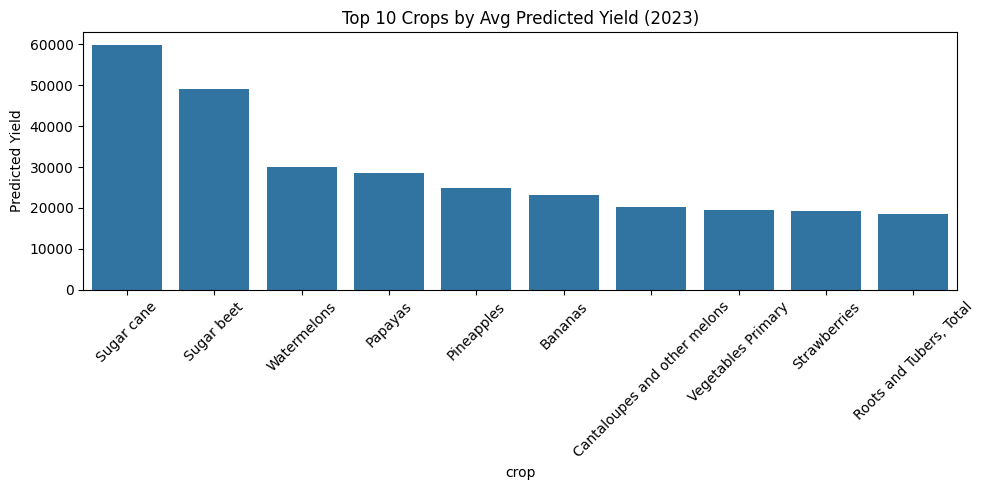

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for valid data if available
if 'output_2023' in locals():
    df = output_2023.copy()
    df['next_year'] = df['year'] + 1
    df = df.rename(columns={'yield_2022': 'yield_2022', 'predicted_yield_2023': 'yield_2023'})

    # 1. Bar Chart — Top 10 Crops by Predicted Yield in 2023
    top_crops = df.groupby('crop')['yield_2023'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_crops.index, y=top_crops.values)
    plt.title("Top 10 Crops by Avg Predicted Yield (2023)")
    plt.ylabel("Predicted Yield")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



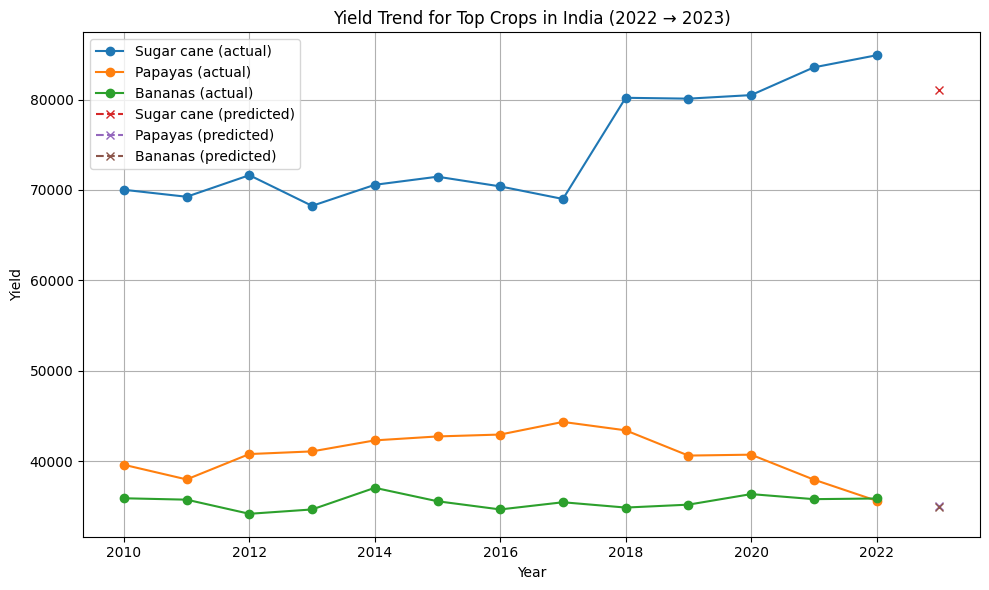

In [143]:
# Graph 2 — Yield Trend for Top 3 Crops in India (actual + predicted)

#  Get top 3 crops in India by predicted 2023 yield
top_crops_india = df[df['country'] == 'India'] \
                    .groupby('crop')['yield_2023'] \
                    .mean().sort_values(ascending=False).head(3).index

# Plot actual yields over time from final_df_sorted
plt.figure(figsize=(10, 6))
for crop in top_crops_india:
    actual = final_df_sorted[(final_df_sorted['country'] == 'India') &
                             (final_df_sorted['crop'] == crop)]
    plt.plot(actual['year'], actual['yield'], marker='o', label=f"{crop} (actual)")

# Plot predicted 2023 yield
for crop in top_crops_india:
    predicted = df[(df['country'] == 'India') & (df['crop'] == crop)]
    plt.plot(predicted['next_year'], predicted['yield_2023'], linestyle='--', marker='x', label=f"{crop} (predicted)")

# Final styling
plt.title("Yield Trend for Top Crops in India (2022 → 2023)")
plt.xlabel("Year")
plt.ylabel("Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



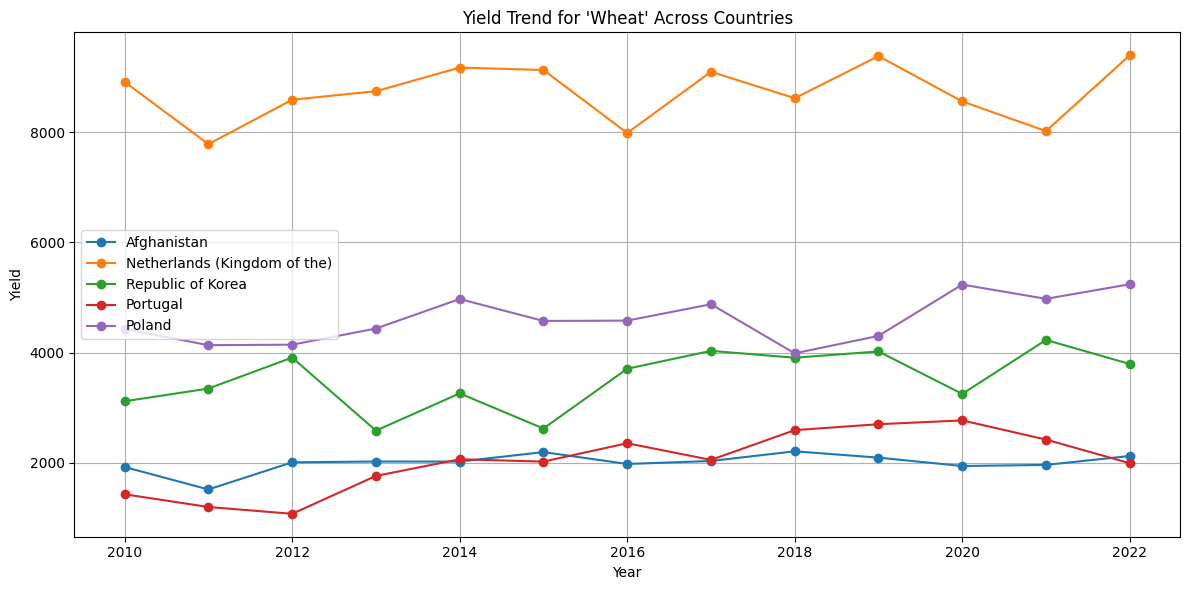

In [144]:
target_crop = "Wheat"
subset = final_df_sorted[final_df_sorted['crop'] == target_crop]

plt.figure(figsize=(12, 6))
for country in subset['country'].value_counts().head(5).index:
    country_data = subset[subset['country'] == country]
    plt.plot(country_data['year'], country_data['yield'], marker='o', label=country)

plt.title(f"Yield Trend for '{target_crop}' Across Countries")
plt.xlabel("Year")
plt.ylabel("Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



<ipython-input-145-72f7733e6f77>:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 1600x800 with 0 Axes>

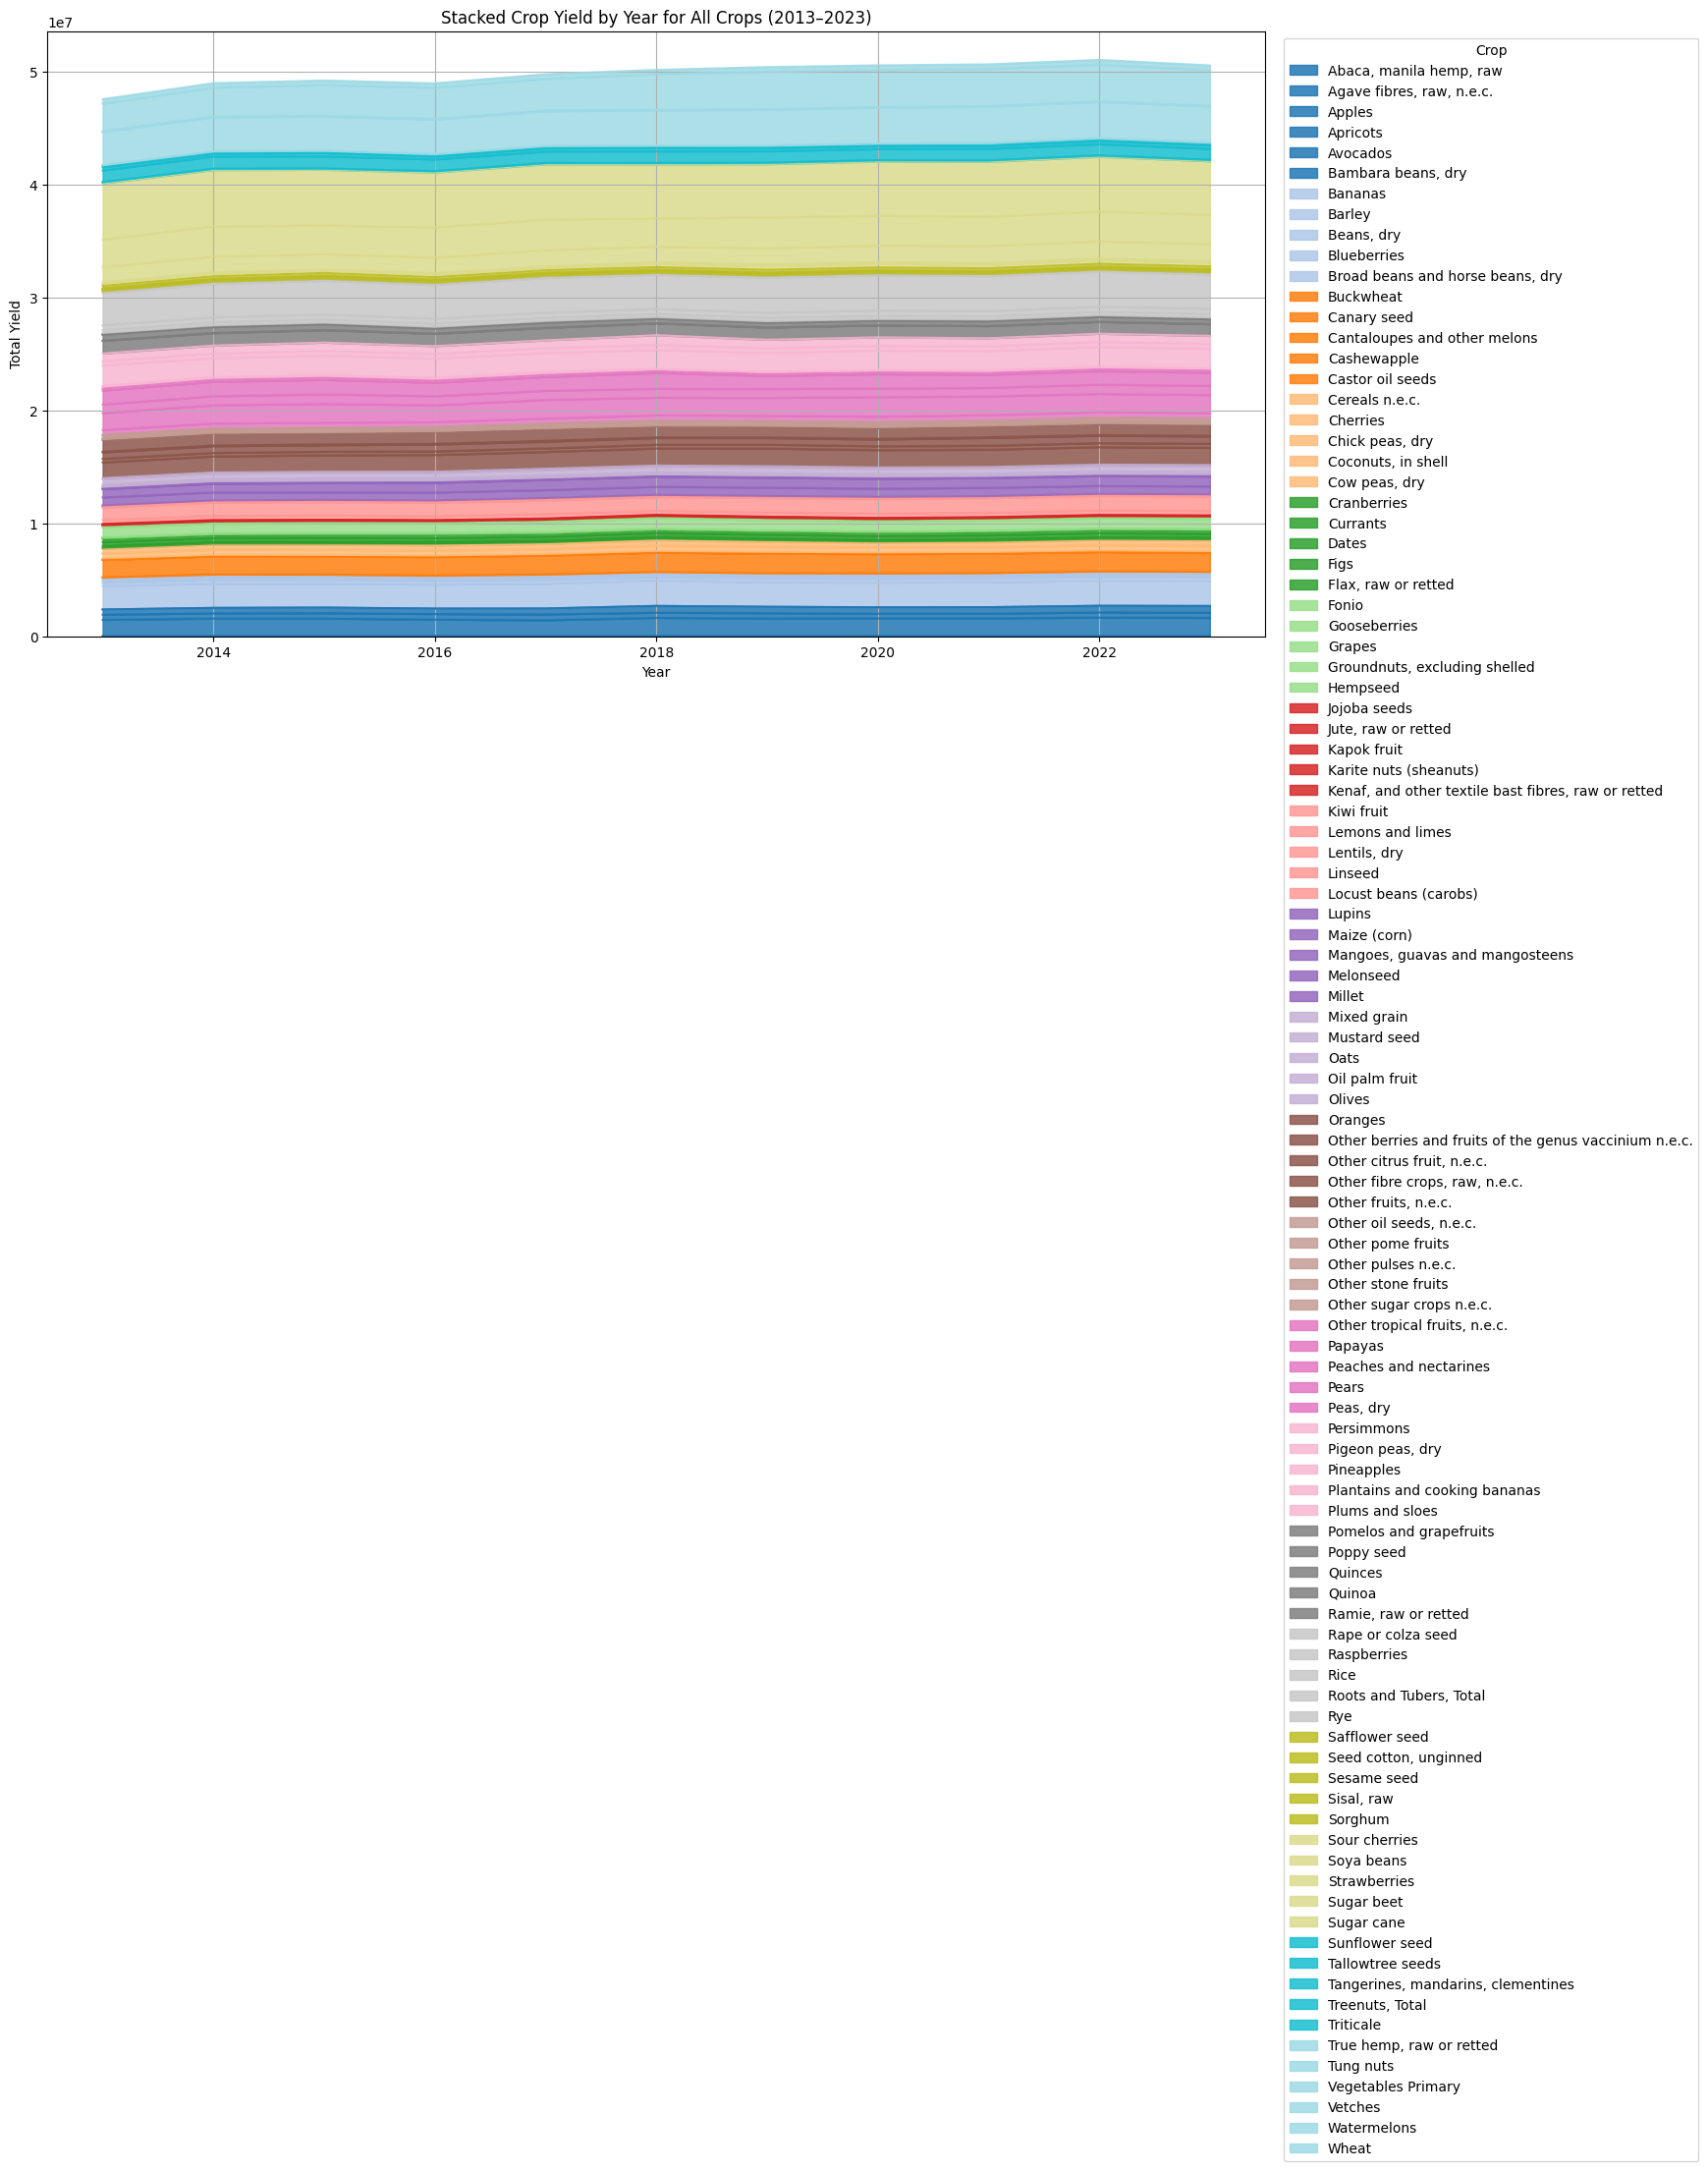

In [145]:
# Reconstruct the actual_df and predicted_df from saved context if possible
# Assuming final_df_sorted and df exist with appropriate structure

# Rebuild actual_df
actual_df = final_df_sorted[final_df_sorted['year'] >= 2013].copy()
actual_df['source'] = 'Actual'
actual_df = actual_df.rename(columns={'yield': 'yield_value'})
actual_df = actual_df[['year', 'crop', 'yield_value', 'source']]

# Rebuild predicted_df
predicted_df = df.copy()
predicted_df['year'] = predicted_df['next_year']  # set year as 2023
predicted_df['source'] = 'Predicted'
predicted_df = predicted_df.rename(columns={'yield_2023': 'yield_value'})
predicted_df = predicted_df[['year', 'crop', 'yield_value', 'source']]

# Combine both
combined_df = pd.concat([actual_df, predicted_df], ignore_index=True)

# Pivot for stacked area plot
pivot_all_crops = combined_df.pivot_table(index='year', columns='crop', values='yield_value', aggfunc='sum')

# Plot stacked area chart for all crops (actual + predicted 2023)
plt.figure(figsize=(16, 8))
pivot_all_crops.plot(kind='area', stacked=True, alpha=0.85, figsize=(16, 8), colormap='tab20')
plt.title("Stacked Crop Yield by Year for All Crops (2013–2023)")
plt.xlabel("Year")
plt.ylabel("Total Yield")
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), title='Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


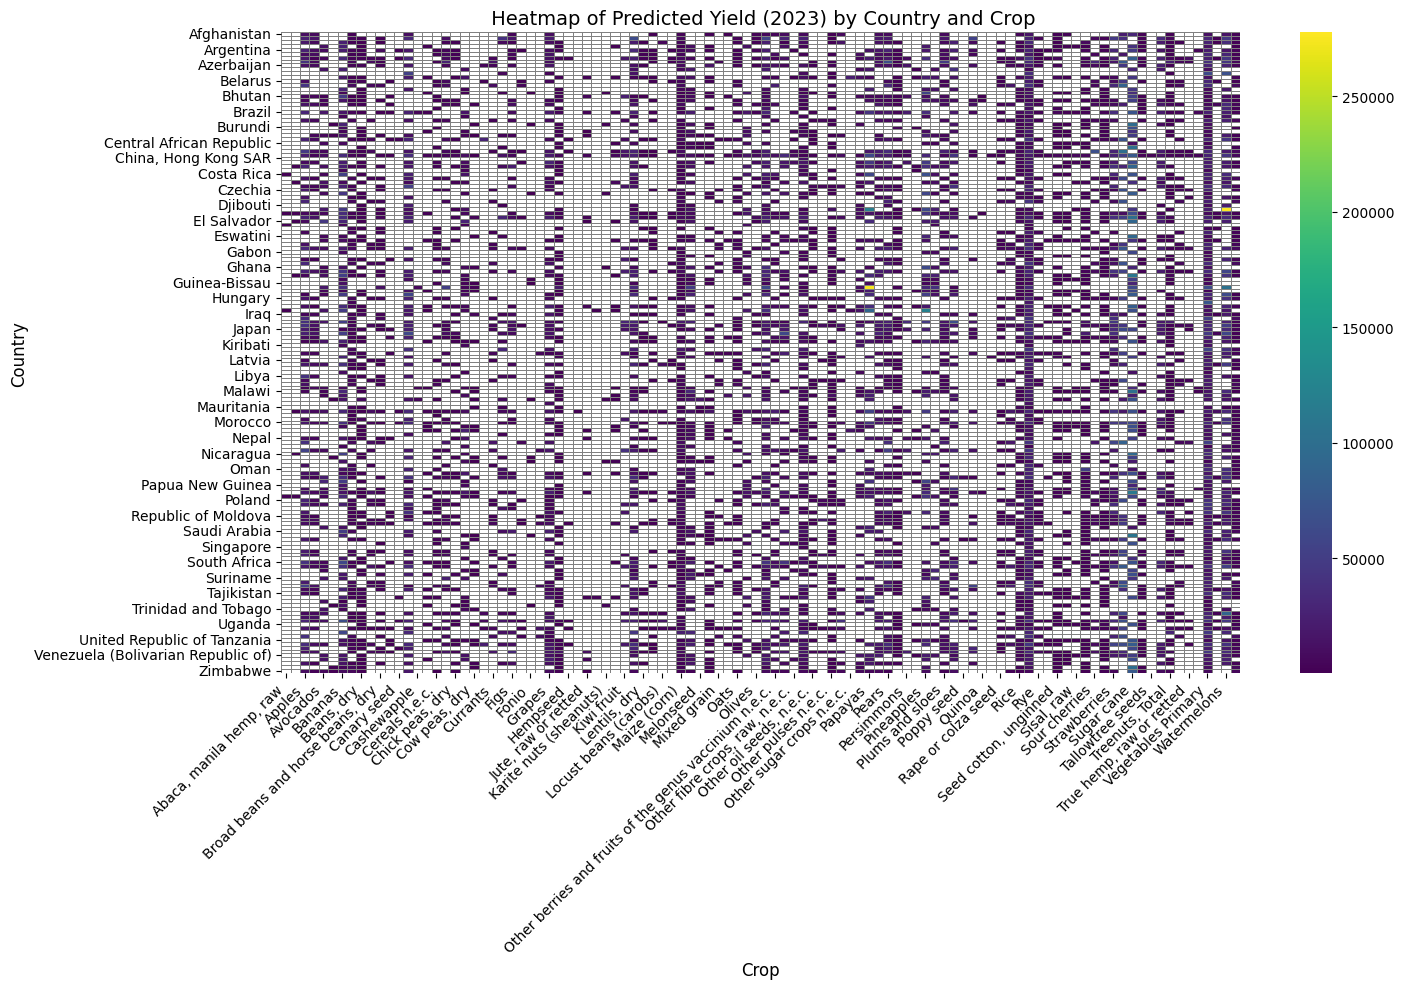

In [146]:
# Ensure df is the correct DataFrame (output_2023 with predicted yields)
if 'output_2023' in locals():
    df = output_2023.copy()
    df = df.rename(columns={'predicted_yield_2023': 'yield_2023'})

    # Create pivot table: rows = countries, columns = crops, values = average predicted yield
    pivot = df.pivot_table(index='country', columns='crop', values='yield_2023', aggfunc='mean')

    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(pivot, cmap='viridis', linewidths=0.5, linecolor='gray')
    plt.title(" Heatmap of Predicted Yield (2023) by Country and Crop", fontsize=14)
    plt.xlabel("Crop", fontsize=12)
    plt.ylabel("Country", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("output_2023' DataFrame not found. Please ensure it exists before plotting.")


In [147]:
import plotly.express as px

# Prepare data for choropleth map
if 'output_2023' in locals():
    # Compute average predicted yield per country
    avg_yield_country = output_2023.groupby('country')['predicted_yield_2023'].mean().reset_index()
    avg_yield_country.columns = ['country', 'avg_predicted_yield_2023']

    # Plot choropleth
    fig = px.choropleth(
        avg_yield_country,
        locations='country',
        locationmode='country names',
        color='avg_predicted_yield_2023',
        color_continuous_scale='Viridis',
        title='Average Predicted Crop Yield by Country (2023)',
        labels={'avg_predicted_yield_2023': 'Predicted Yield'},
    )

    # Layout tweaks for clarity
    fig.update_layout(
        coloraxis_colorbar=dict(
            title="Predicted<br>Yield",
            titlefont_size=14,
            tickfont_size=12,
            lenmode="pixels",
            len=300,
            yanchor="middle",
            y=0.5,
        ),
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
        margin=dict(l=0, r=0, t=60, b=0)
    )

    fig.show()
else:
    print("output_2023' not found.")



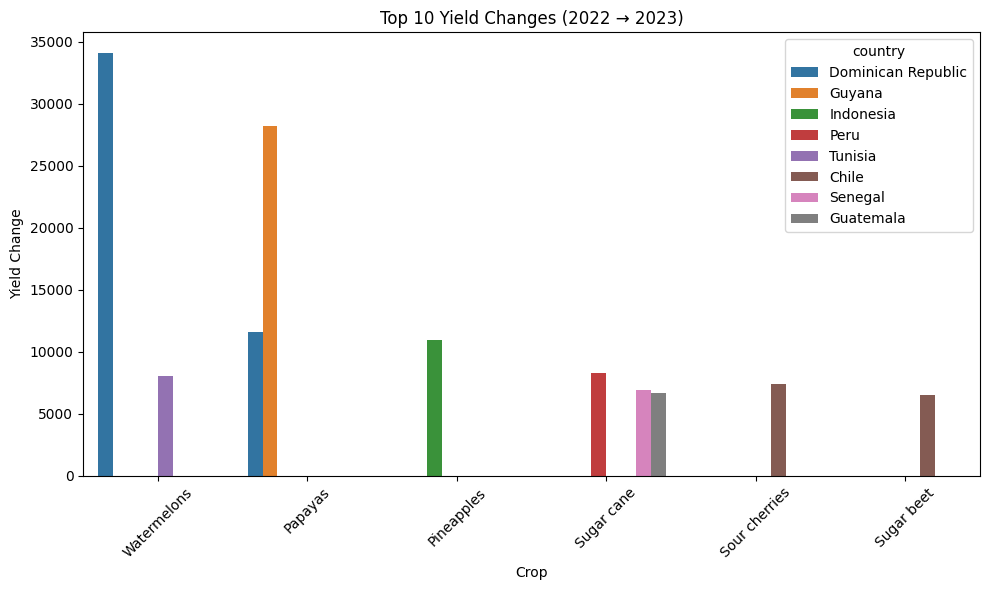

In [148]:
# Yield Change 2022 → 2023
df['yield_change'] = df['yield_2022'] - df['yield_2023']

# Get top 10 yield changes (largest positive or negative)
top_changes = df.sort_values('yield_change', key=abs, ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_changes, x='crop', y='yield_change', hue='country')
plt.title("Top 10 Yield Changes (2022 → 2023)")
plt.ylabel("Yield Change")
plt.xlabel("Crop")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



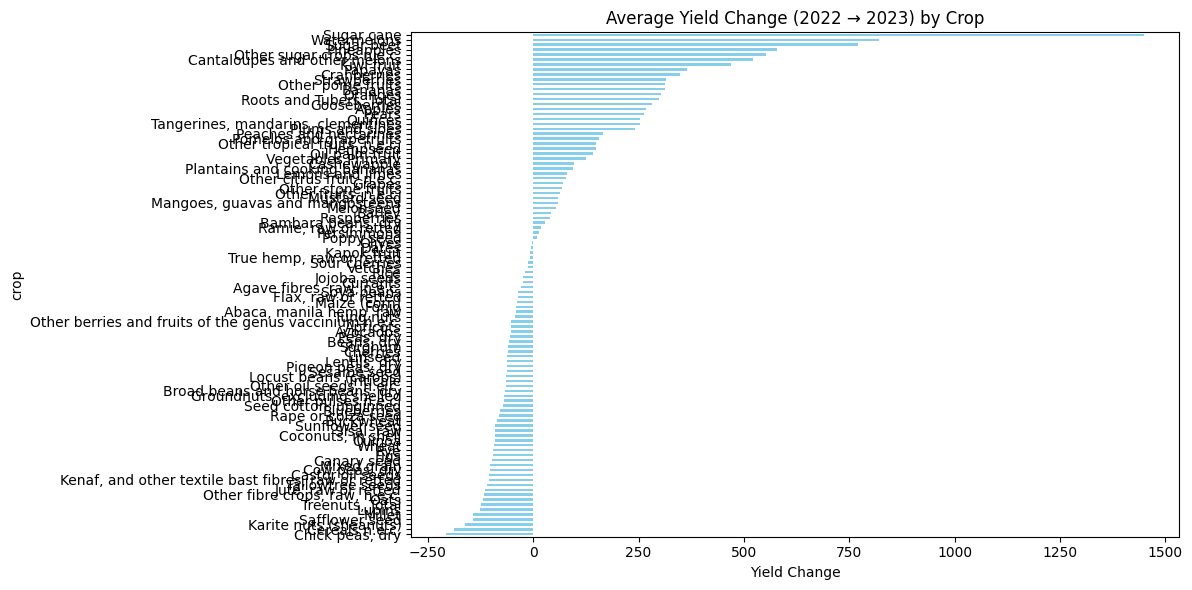

In [149]:
df['yield_change'] = df['yield_2022'] - df['yield_2023']
delta_by_crop = df.groupby('crop')['yield_change'].mean().sort_values()

plt.figure(figsize=(12, 6))
delta_by_crop.plot(kind='barh', color='skyblue')
plt.title("Average Yield Change (2022 → 2023) by Crop")
plt.xlabel("Yield Change")
plt.tight_layout()
plt.show()


<ipython-input-150-3d5c329155e0>:22: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



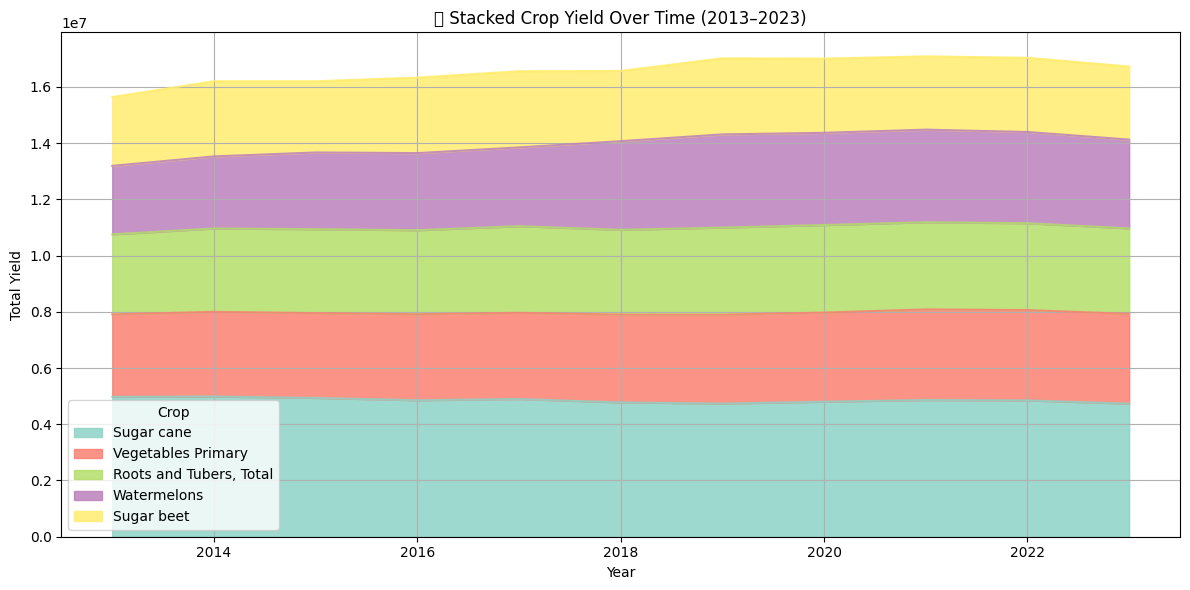

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine actual + predicted data
stack_df = pd.concat([actual_df, predicted_df], ignore_index=True)

#  Pivot to create year vs. crop matrix
pivot_df = stack_df.pivot_table(index='year', columns='crop', values='yield_value', aggfunc='sum')

#  Keep top N crops by total yield
top_crops = pivot_df.sum().sort_values(ascending=False).head(5).index
pivot_df = pivot_df[top_crops]

#  Plot stacked area chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='area', stacked=True, colormap='Set3', alpha=0.85, figsize=(12, 6))
plt.title("📊 Stacked Crop Yield Over Time (2013–2023)")
plt.xlabel("Year")
plt.ylabel("Total Yield")
plt.legend(title="Crop")
plt.grid(True)
plt.tight_layout()
plt.show()



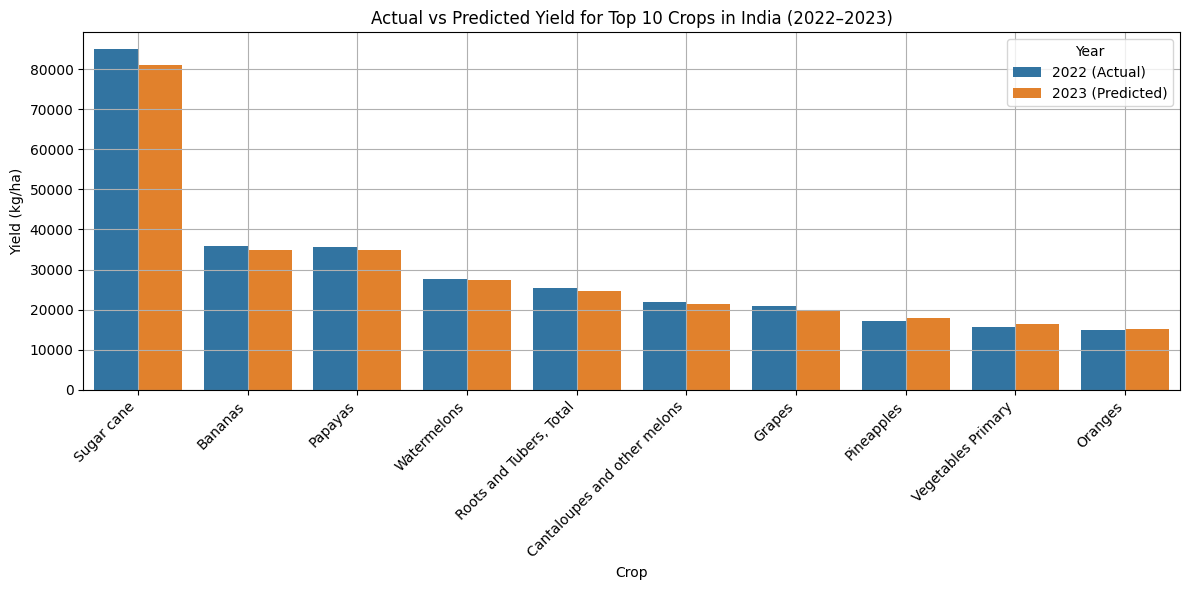

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming this DataFrame exists
# Columns: country, crop, year, yield_2022, next_year, predicted_yield_2023
india_df = output_2023[output_2023['country'] == 'India'].copy()

# Sort crops by yield_2022 for clearer plot
top_crops = india_df.sort_values(by='yield_2022', ascending=False).head(10)

# Melt for plotting
melted = pd.melt(
    top_crops,
    id_vars=['crop'],
    value_vars=['yield_2022', 'predicted_yield_2023'],
    var_name='Year',
    value_name='Yield'
)

# Replace column names for clarity
melted['Year'] = melted['Year'].replace({
    'yield_2022': '2022 (Actual)',
    'predicted_yield_2023': '2023 (Predicted)'
})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='crop', y='Yield', hue='Year')
plt.xticks(rotation=45, ha='right')
plt.title("Actual vs Predicted Yield for Top 10 Crops in India (2022–2023)")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Crop")
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-155-e2689ae15c27>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




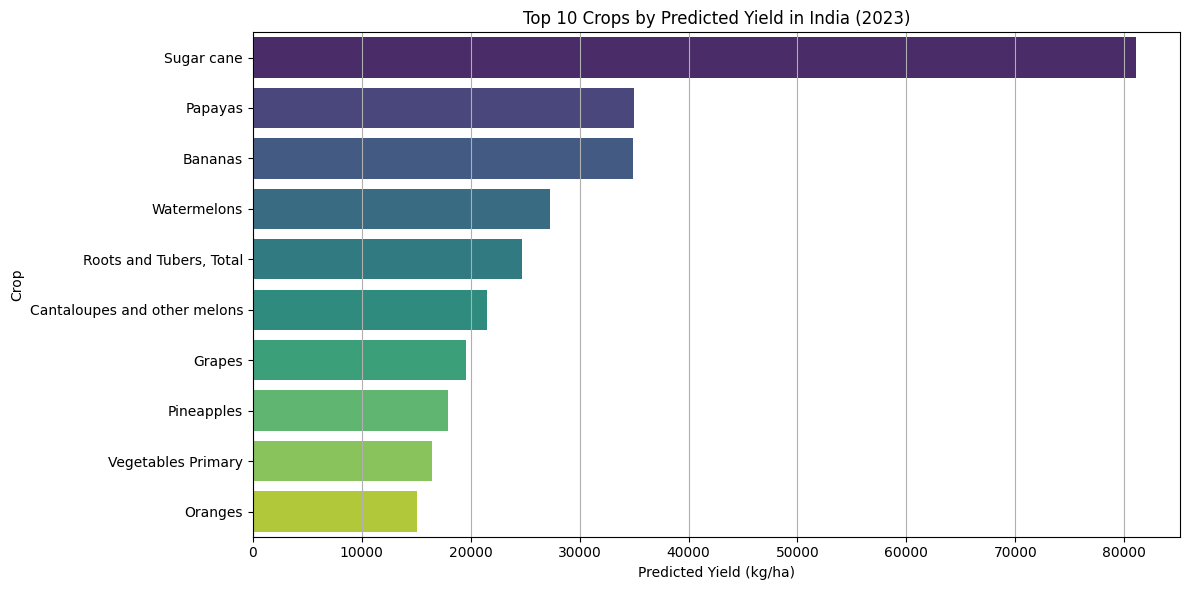

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'output_2023' contains your full predictions
top_crops_pred = output_2023[output_2023['country'] == 'India']  # or remove filter for global
top_crops_pred = top_crops_pred.sort_values(by='predicted_yield_2023', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_crops_pred, x='predicted_yield_2023', y='crop', palette='viridis')
plt.title("Top 10 Crops by Predicted Yield in India (2023)")
plt.xlabel("Predicted Yield (kg/ha)")
plt.ylabel("Crop")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
